## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.png`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



## Lab Resources

https://drive.google.com/drive/folders/1DnF8_teHpzrHNvSspl-W5ooxNyxvUU2t?usp=sharing

Some Instructions to be strictly followed:
- You have to do the task individually but can discuss about the solution approach and possible technique to be applied to get the task done.
- **Do not share any of your code** with your fellow classmates that may have a huge penalty on both of your score.
- Create a git repo and submit the task there. Try to commit after completing each task individually. The git repo should be **private** until the submission.
- Make a video presentation of 4 minutes(max) explaining:
  1. Briefly explain the logical part of each task and what approaches you have taken to solve the problem
  2. Show the graphics output of the tasks
  3. Give a tour of your code
  4. Is there any other way to achieve similar/better results
  5. Mention the sources you got assistance from.[e.g. chatGPT]

### Deadline: 27/12/24 <11:59 pm>
*I won't accept any late submission. Your git repo should be public after 28/12/24 12:00 am*

Submission Link: https://docs.google.com/forms/d/e/1FAIpQLScK7S7uc_zNd4yhNyyAS0J97fq2S4k7fzZcf4pvX3z0E3A2rg/viewform?usp=header

# **Task 1**

Image Dimensions: (225, 225)
Intensity Range: (5, 255)
Frequency Distribution (first 10 values): {5: 1, 31: 1, 35: 1, 37: 1, 45: 3, 47: 1, 48: 2, 51: 1, 52: 1, 57: 2}


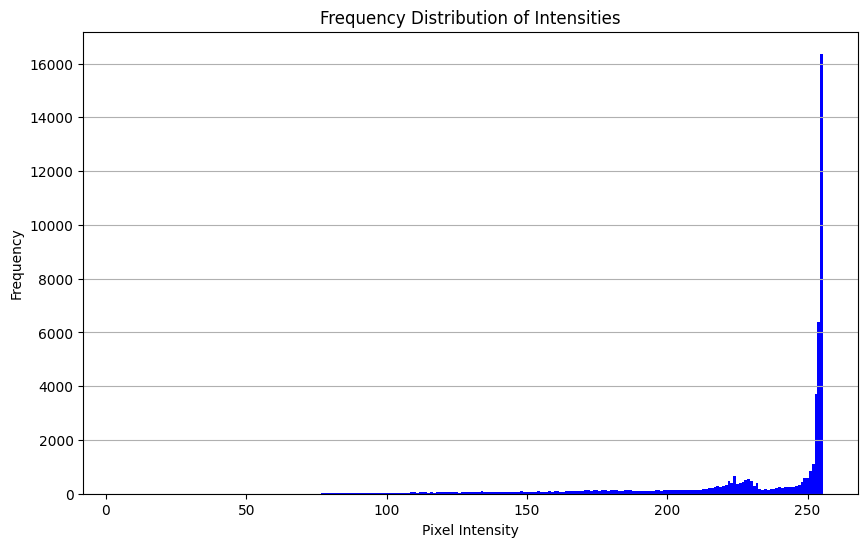

In [32]:
# image dimension, frequency distribution of intensities, range
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/DIP_Lab_task_01.png', cv2.IMREAD_GRAYSCALE)

# Extract image dimensions
dimensions = image.shape

# Calculate frequency distribution of pixel intensities
unique, counts = np.unique(image, return_counts=True)
intensity_distribution = dict(zip(unique, counts))

# Find the range of intensities
intensity_range = (np.min(image), np.max(image))

# Print details
print(f"Image Dimensions: {dimensions}")
print(f"Intensity Range: {intensity_range}")
print("Frequency Distribution (first 10 values):", dict(list(intensity_distribution.items())[:10]))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='blue', width=1.0)
plt.title("Frequency Distribution of Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


# **Task 2**

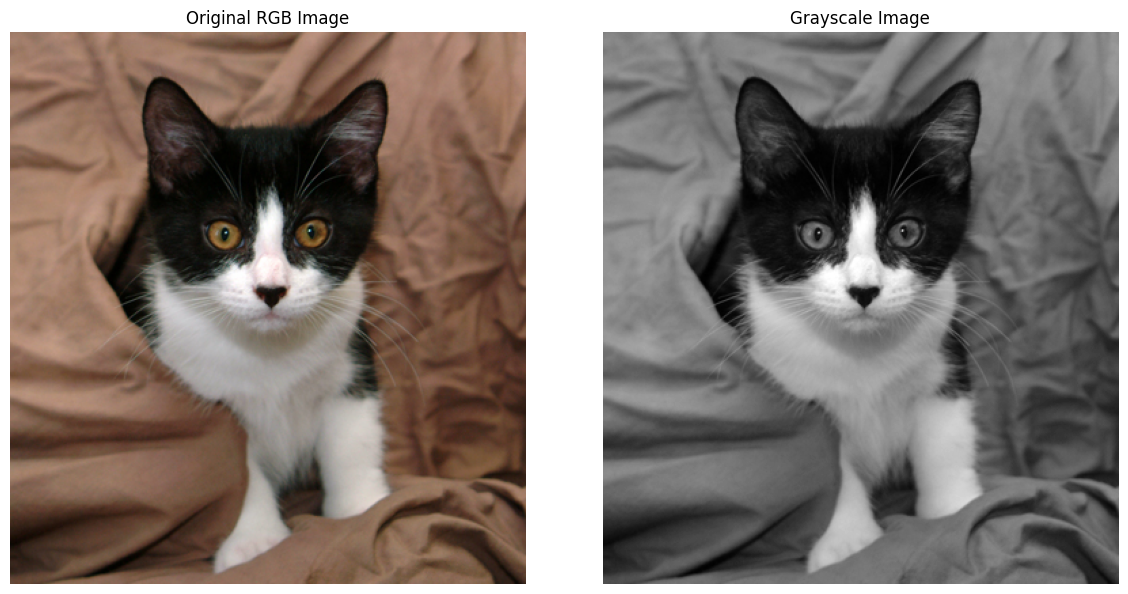

Grayscale Sub-region (5x5):
[[127 129 130 130 131]
 [129 130 132 133 132]
 [131 133 135 135 134]
 [133 134 136 135 135]
 [135 134 136 136 136]]

Sub-region Statistics:
Mean Intensity: 132.84
Standard Deviation: 2.5562472493872734
Minimum Intensity: 127
Maximum Intensity: 136


In [33]:
# Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison).
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/DIP_Lab_task_02 .jpg'
rgb_image = cv2.imread(image_path)

grayscale_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis("off")

# Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.tight_layout()
plt.show()

# Dimensions of the sub-region (5x5)
sub_region_size = (5, 5)

# Extract a sub-region from the top-left corner
sub_region = grayscale_image[:sub_region_size[0], :sub_region_size[1]]

# Display the grayscale sub-region
print("Grayscale Sub-region (5x5):")
print(sub_region)

# Compute statistics for the sub-region for comparison
sub_region_mean = np.mean(sub_region)
sub_region_std = np.std(sub_region)
sub_region_min = np.min(sub_region)
sub_region_max = np.max(sub_region)

# Output the comparison results
print(f"\nSub-region Statistics:")
print(f"Mean Intensity: {sub_region_mean}")
print(f"Standard Deviation: {sub_region_std}")
print(f"Minimum Intensity: {sub_region_min}")
print(f"Maximum Intensity: {sub_region_max}")



# **Task 3**

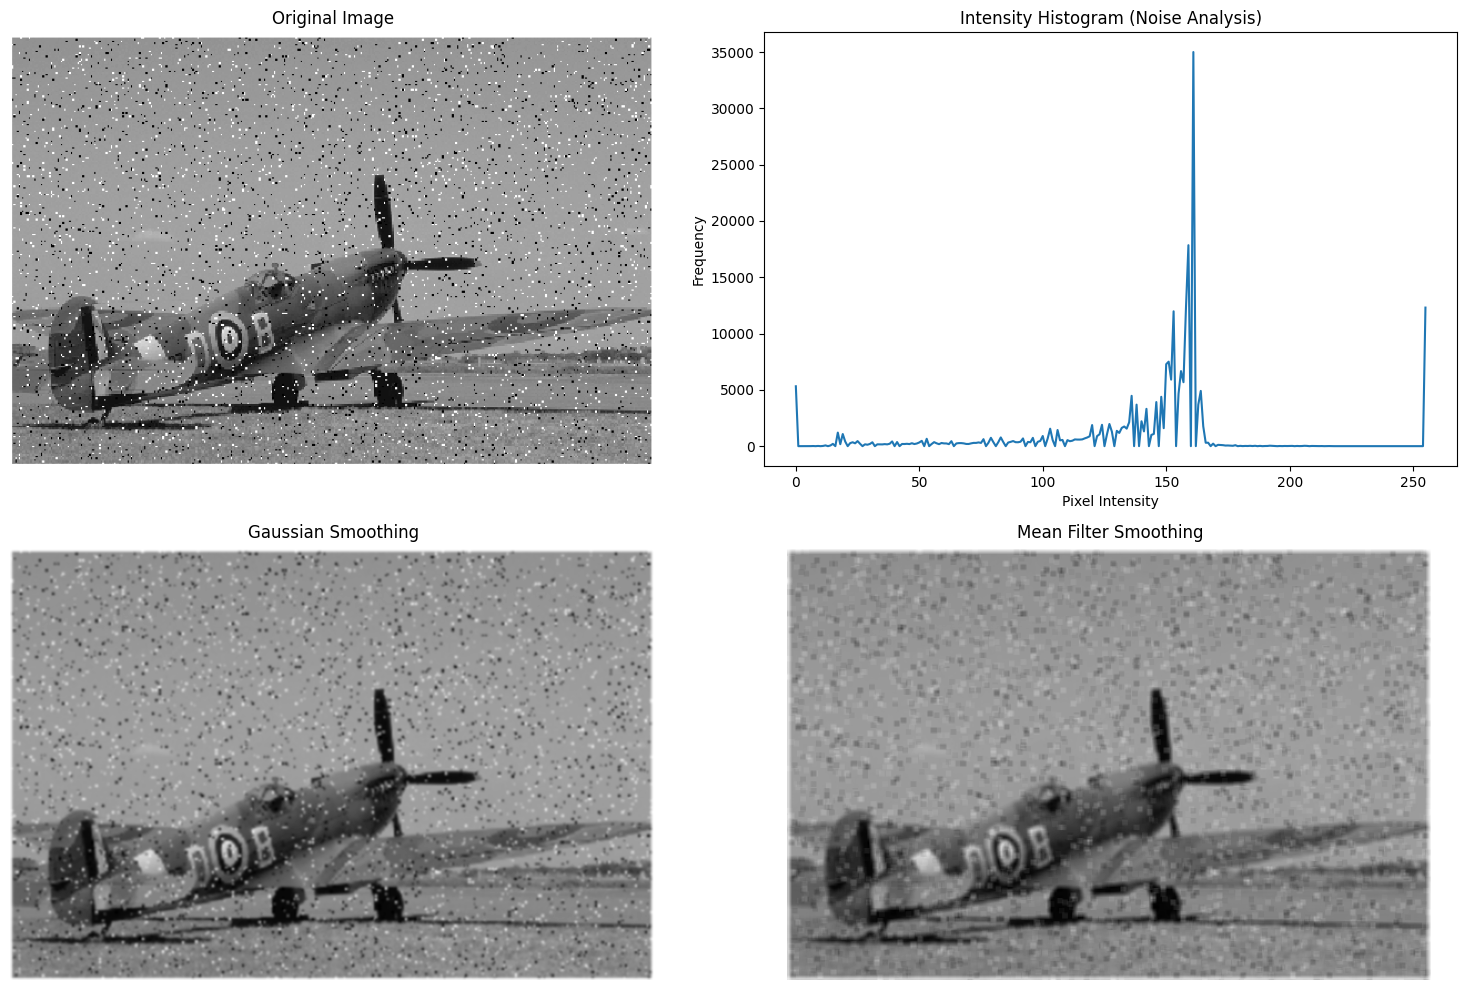

In [ ]:
# Apply Image(DIP_Lab_task_03.png) smoothing with appropriate kernel applied. Identify the noise(if any) before processing.
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/DIP_Lab_task_03.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Identify noise using the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.subplot(2, 2, 2)
plt.title("Intensity Histogram (Noise Analysis)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist)

# Apply Gaussian smoothing
gaussian_kernel_size = (5, 5)
gaussian_smoothed_image = cv2.GaussianBlur(image, gaussian_kernel_size, sigmaX=0)

plt.subplot(2, 2, 3)
plt.title("Gaussian Smoothing")
plt.imshow(gaussian_smoothed_image, cmap='gray')
plt.axis('off')

# Apply mean filter (box filter)
mean_kernel_size = (5, 5)
mean_smoothed_image = cv2.blur(image, mean_kernel_size)

plt.subplot(2, 2, 4)
plt.title("Mean Filter Smoothing")
plt.imshow(mean_smoothed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



# **Task 4**

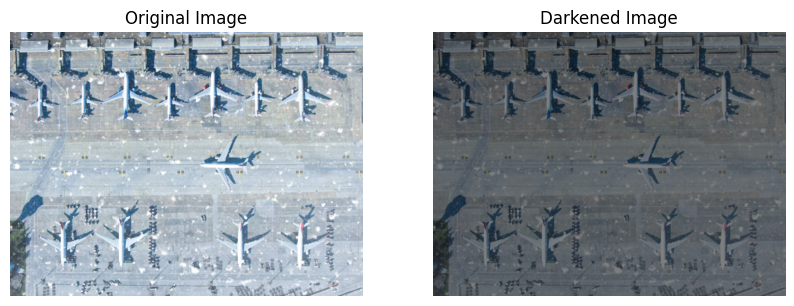

In [ ]:
#Implement an appropriate technique to reduce the brightness of the provided image (DIP_Lab_task_04.jpg) effectively.
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/DIP_Lab_task_04.jpg'
image = cv2.imread(image_path)

# Method to reduce brightness
def reduce_brightness(image, factor=0.5):
    darkened_image = np.clip(image * factor, 0, 255).astype(np.uint8)
    return darkened_image

# Reduce the brightness of the image
darkened_image = reduce_brightness(image, factor=0.5)

# Display original and darkened images for comparison
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Darkened Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(darkened_image, cv2.COLOR_BGR2RGB))
plt.title("Darkened Image")
plt.axis("off")

plt.show()




# **Task 5**

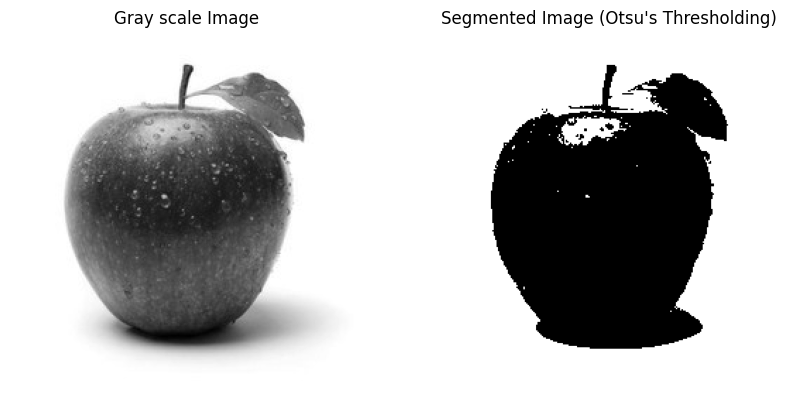

In [ ]:
#Solve the segmentation problem for the given image: 'DIP_Lab_task_05.jpg'
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/DIP_Lab_task_05.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Otsu's method will automatically compute the threshold value for segmentation
_, segmented_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gray scale Image")
plt.axis("off")

# Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image (Otsu's Thresholding)")
plt.axis("off")

plt.show()

